In [1]:
import re
from itertools import combinations

import pandas as pd
import textdistance
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fileObject = open('Data\\horoscope_ribyhoroscop.txt', 'r', encoding='utf-8')
posts_read = fileObject.read()
posts_read = posts_read.replace(u'\xa0', u' ')

In [3]:
posts_read = posts_read.split('"\n')

In [5]:
posts = pd.DataFrame(posts_read, columns=['text'])

In [6]:
posts['length'] = pd.DataFrame(map(lambda x: len(x), posts_read))

In [8]:
posts.describe()

,length
count,2728.000000
mean,554.023460
std,398.138128
min,0.000000
25%,302.000000
50%,361.500000
75%,856.000000
max,7405.000000


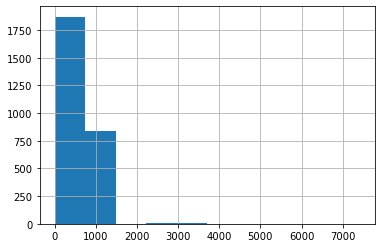

In [9]:
pd.plotting.hist_series(posts.length)

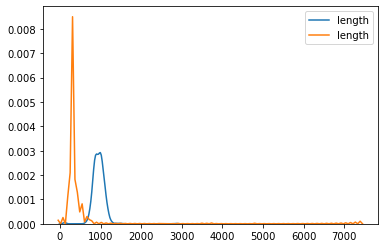

In [10]:
sns.kdeplot(posts.length[:844])
sns.kdeplot(posts.length[844:])
plt.show()

In [12]:
months = ['января', 'февраля', 'марта',
          'апреля', 'мая', 'июня',
          'июля', 'августа', 'сентября',
          'октября', 'ноября', 'декабря']

In [13]:
need_words = months + ['на завтра', 'Завтра']
def find_word(phrase):
    for word in need_words:
        if word in phrase:
            return True
    return False

In [15]:
len(posts[~posts.text.map(find_word)])

67

In [16]:
posts.drop(posts[~posts.text.map(find_word)].index, inplace=True)

In [17]:
posts.reset_index(inplace=True, drop=True)

In [19]:
posts.text = posts.text.map(lambda x: x.replace('"', ''))

In [22]:
def get_date(phrase):
    date = None
    for month in months:
        if month in phrase:
            regexp_date = r'[1-9]?[0-9][ \t]+' + month
            pattern = re.compile(regexp_date, flags=re.I)
            tmp = re.findall(pattern, phrase)
            if len(tmp) > 0:
                date = tmp[0]
    return date

In [24]:
posts['date'] = posts.text.map(get_date)

In [25]:
posts[posts.date.isna()]

,text,length,date
483,Гороскоп на завтра \n\nПриятный и комфортный д...,1231,None
1183,Бизнес-гороскоп на завтра (20-04-2017) \n\nНеп...,362,None
1648,"Завтра Рыбы будут чувствовать, что не в силах ...",325,None
1651,Завтра звезды гороскопа будут склонять Рыб без...,446,None
2525,Финансовый гороскоп на завтра для Рыб\n\nЭто с...,93,None
2548,"ИЗМЕНА ПО ГОРОСКОПУ\n\nГоворят, что ревность –...",3492,None
2549,Финансовый гороскоп на завтра для Рыб\n\nЭто с...,299,None
2550,Рыбы. Любовный гороскоп на завтра\n\nСегодня р...,286,None
2552,Финансовый гороскоп на завтра для Рыб\n\nДень ...,426,None
2553,Рыбы. Любовный гороскоп на завтра\n\nСегодня в...,353,None


In [26]:
posts.drop(posts[~posts.text.map(lambda x: False if 'ЗОДИАКА' in x else True)].index, inplace=True)
posts.drop(posts[~posts.text.map(lambda x: False if 'ГОРОСКОП' in x else True)].index, inplace=True)
posts.drop(posts[~posts.text.map(lambda x: False if 'ЗНАК' in x else True)].index, inplace=True)

In [27]:
posts.reset_index(inplace=True, drop=True)

In [36]:
posts[posts.date.isna()].sort_values('length', ascending=False)

,text,length,date
2592,\nВ этот момент происходит замена объекта для ...,5805,None
2601,"Гороскоп на 2016 год для Рыб\n\nРыб, от изумле...",3466,None
483,Гороскоп на завтра \n\nПриятный и комфортный д...,1231,None
2573,Финансовый гороскоп на завтра для Рыб\n\nВероя...,481,None
2560,Финансовый гороскоп на завтра для Рыб\n\nБлаго...,466,None
1651,Завтра звезды гороскопа будут склонять Рыб без...,446,None
2633,Завтра у Рыб есть шанс узнать инсайдерскую инф...,434,None
2551,Финансовый гороскоп на завтра для Рыб\n\nДень ...,426,None
2575,Финансовый гороскоп на завтра для Рыб\n\nВероя...,402,None
2558,Рыбы. Любовный гороскоп на завтра\n\nСегодня в...,392,None


In [39]:
posts.drop(posts[posts.length > 3000].index)

,text,length,date
0,Гороскоп на 11 декабря 2019 года \n Если сегод...,981,11 декабря
1,Гороскоп на 10 декабря 2019 года \n Сегодня лу...,831,10 декабря
2,Гороскоп на 9 декабря 2019 года \n Запаситесь ...,957,9 декабря
3,Гороскоп на 8 декабря 2019 года \n Время - сам...,780,8 декабря
4,Гороскоп на 7 декабря 2019 года \n Если вы бол...,824,7 декабря
...,...,...,...
2650,"2 марта, воскресенье\n\nДень восстановления ут...",331,2 марта
2651,"1 марта, суббота\n\nВесьма трудный день у Рыб....",273,1 марта
2652,"28 февраля, пятница\n\nДневные часы подходят д...",537,28 февраля
2653,"27 февраля, четверг\n\nСобытия этого дня учат ...",528,27 февраля


In [9]:
class CleanText:
    def __init__(self, filepath):
        self.filepath = filepath
        self.posts = self._read_file()        
        self.months = ['января', 'февраля', 'марта',
                       'апреля', 'мая', 'июня',
                       'июля', 'августа', 'сентября',
                       'октября', 'ноября', 'декабря']
        self.stage = 0
        
    def find_word(self, phrase):
        for word in self.months + ['на завтра', 'Завтра']:
            if word in phrase:
                return True
        return False
    
    def get_date(self, phrase):
        date = None
        for month in self.months:
            if month in phrase:
                regexp_date = r'[1-9]?[0-9][ \t]+' + month
                pattern = re.compile(regexp_date, flags=re.I)
                tmp = re.findall(pattern, phrase)
                if len(tmp) > 0:
                    date = tmp[0]
        return date
    
    def _read_file(self):
        fileObject = open(self.filepath, 'r', encoding='utf-8')
        posts_read = fileObject.read()
        posts_read = posts_read.replace(u'\xa0', u' ')
        posts_read = posts_read.split('"\n')
        posts = pd.DataFrame(posts_read, columns=['text'])
        posts['length'] = pd.DataFrame(map(lambda x: len(x), posts_read))
        return posts
    
    def _replace_unnecessary_chars(self):
        self.posts.text = self.posts.text.map(lambda x: x.replace('"', ''))
        return self.posts
        
    def _drop_not_daily_horoscope(self):
        self.posts.drop(self.posts[~self.posts.text.map(self.find_word)].index,
                        inplace=True)
        self.posts.drop(self.posts[~self.posts.text.map(lambda x: False 
                                         if 'ЗОДИАКА' in x else True)].index,
                   inplace=True)
        self.posts.drop(self.posts[~self.posts.text.map(lambda x: False 
                                         if 'ГОРОСКОП' in x else True)].index, 
                   inplace=True)
        self.posts.drop(self.posts[~self.posts.text.map(lambda x: False 
                                        if 'ЗНАК' in x else True)].index, 
                   inplace=True)
        self.posts.reset_index(inplace=True, drop=True)
        return self.posts
        
    def _make_date(self):
        self.posts['date'] = self.posts.text.map(self.get_date)
        return self.posts
    
    def _drop_long_text(self):
        self.posts.drop(self.posts[self.posts.length > 3000].index,
                        inplace=True)
        self.posts.reset_index(inplace=True, drop=True)
        return self.posts
    
    def get_modified_df(self, num_steps='all'):
        if num_steps == 'all':
            num_steps = 4
        list_of_actions = [self._replace_unnecessary_chars,
                           self._drop_not_daily_horoscope,
                           self._make_date,
                           self._drop_long_text
                          ]
        if num_steps < self.stage:
            self._read_file()            
        for i in range(self.stage, num_steps):
            list_of_actions[i]()
            
        return self.posts      

In [86]:
posts.drop(posts[posts.length > 3000].index, inplace=True)

In [88]:
posts.reset_index(inplace=True, drop=True)

In [89]:
posts

,text,length,date
0,Гороскоп на 11 декабря 2019 года \n Если сегод...,981,11 декабря
1,Гороскоп на 10 декабря 2019 года \n Сегодня лу...,831,10 декабря
2,Гороскоп на 9 декабря 2019 года \n Запаситесь ...,957,9 декабря
3,Гороскоп на 8 декабря 2019 года \n Время - сам...,780,8 декабря
4,Гороскоп на 7 декабря 2019 года \n Если вы бол...,824,7 декабря
...,...,...,...
2648,"2 марта, воскресенье\n\nДень восстановления ут...",331,2 марта
2649,"1 марта, суббота\n\nВесьма трудный день у Рыб....",273,1 марта
2650,"28 февраля, пятница\n\nДневные часы подходят д...",537,28 февраля
2651,"27 февраля, четверг\n\nСобытия этого дня учат ...",528,27 февраля


In [90]:
pattern = re.compile(r'(бизнес[^а-я].+)\n{1,2}(.+)', re.I)
re.findall(pattern, posts.text[0])
#posts.text[0]

[('Бизнес-гороскоп на 11 декабря 2019 года ',
  ' Сегодня вы можете почувствовать незащищенность и неуверенность в собственных силах. Попробуйте проанализировать ситуацию и выяснить, что же так сильно выбило вас из колеи. Принимая во внимание вашу уязвимость, постарайтесь избегать тех ситуаций, которые требуют проявления всех стальных черт характера. Сейчас это для вас будет трудновато.')]

In [97]:
pattern_bus = re.compile(r'(Бизнес[^а-я].+|Финансовый.+)\n{1,2}(.+)')
pattern_lov = re.compile(r'(Любовный.+)\n{1,2}(.+)')
i = 0
for post in posts.text:
    print(i)
    find_bus = re.findall(pattern_bus, post)
    find_lov = re.findall(pattern_lov, post)
    flag = True
#    if len(find_bus) > 0:
#        print(find_bus[0][0])
#        flag = False
    if len(find_lov) > 0:
        print(find_lov[0][0])
        flag = False
    if flag:
        print(post)
    print('****************************************************')
    i += 1

0
Любовный гороскоп на 11 декабря 2019 года
****************************************************
1
Любовный гороскоп на 10 декабря 2019 года
****************************************************
2
Любовный гороскоп на 9 декабря 2019 года
****************************************************
3
Любовный гороскоп на 8 декабря 2019 года
****************************************************
4
Любовный гороскоп на 7 декабря 2019 года
****************************************************
5
Любовный гороскоп на 6 декабря 2019 года
****************************************************
6
Любовный гороскоп на 5 декабря 2019 года
****************************************************
7
Любовный гороскоп на 4 декабря 2019 года
****************************************************
8
Любовный гороскоп на 3 декабря 2019 года
****************************************************
9
Любовный гороскоп на 2 декабря 2019 года
****************************************************
10
Любовный гороскоп на 1 декабря 2019

****************************************************
667
Любовный гороскоп на 4 февраля 2018
****************************************************
668
Любовный гороскоп на 3 февраля 2018
****************************************************
669
Любовный гороскоп на 2 февраля 2018
****************************************************
670
Любовный гороскоп на 1 февраля 2018
****************************************************
671
Любовный гороскоп на 31 января 2018
****************************************************
672
Любовный гороскоп на 30 января 2018
****************************************************
673
Любовный гороскоп на 29 января 2018
****************************************************
674
Любовный гороскоп на 28 января 2018
****************************************************
675
Любовный гороскоп на 27 января 2018
****************************************************
676
Любовный гороскоп на 26 января 2018
****************************************************
677
Любовный горо

1256
💸 Бизнес-гороскоп на 24 марта 

Ваши желания сегодня как нельзя лучше соотносятся с вашими возможностями, поэтому вам следует извлечь максимум выгоды из такой ситуации. Принимайтесь за те дела, которые раньше откладывали в долгий ящик несмотря на то, что день сегодня выходной, ибо теперь вам всё по плечу.
****************************************************
1257
Любовный гороскоп на 24 марта
****************************************************
1258
Гороскоп на 23 марта 2017 года

♓ Рыбы
23 марта 2017 года Рыб ожидают яркие встречи, которые запомнятся на всю жизнь. Не затягивайте надолго решение проблемы в любовной сфере. Если упустите шанс создать семью, то потом с трудом найдете достойного человека. В питании соблюдайте умеренность, а для похудения лучшее вообще сесть на диету. Любимое хобби принесет Рыбам истинное удовольствие.
****************************************************
1259
💸 Бизнес-гороскоп на 23 марта 

Сегодня можете смело тратить деньги на приобретение полезных ве

Вам нравится сохранять высокую организованность и усердие. И сегодня Вы будете проявлять исключительную дисциплинированность и сноровку во всех своих стремлениях и начинаниях. Продолжайте придерживаться своих высоких стандартов и прививать их другим людям.
****************************************************
1777
Любовный гороскоп на 23 сентября:
****************************************************
1778
Бизнес-гороскоп на 23 сентября:

Готовьтесь к грядущим на следующей неделе переменам на службе: скорее всего это будет связано с кадровой перестановкой. Вы лучше, чем кто-либо другой, можете описать своё нынешнее положение у себя в компании, а, следовательно, можете сделать соответствующие выводы.
****************************************************
1779
Общий гороскоп на завтра, 23 сентября, 2016 
 
Вам будет крайне важно оставить свой след в этом мире. Вы будете очень целеустремленны и амбициозны. Управление и организация деятельности других людей будет для Вас источником глубокого чу

Бизнес-гороскоп на 15 мая:

Если вы давно искали возможность, чтобы дать ход новым достаточно сложным и трудоёмким предприятиям, вы сегодня сумеете найти такую лазейку. Стоит вам немного потрудиться и проявить во всём своем блеске организаторские способности, как сами увидите, всё наладится само собой.
****************************************************
2167
Любовный гороскоп на 14 мая:
****************************************************
2168
Бизнес-гороскоп на 14 мая:

Этот день как нельзя лучше подходит для освоения нового вида деятельности: хобби или спорта, к которому вы давно мечтали приобщиться. Не бойтесь открывать для себя новое, возможно, именно так вы сумеете найти истинное увлечение не на один год. Живите активно.
****************************************************
2169
Общий гороскоп на завтра, 14 мая, 2016

Эта суббота прекрасно подойдет для ремонта или генеральной уборки. Во второй половине дня Ваш друг может оказать Вам небольшую услугу. Не исключено, что в результате

In [98]:
print(posts.loc[211].text)

Гороскоп на 12 мая 2019 года Рыбы 
У вас могут появиться странные мечты и яркие предчувствия. Ваша интуиция и телепатические способности работают на высоком уровне, вы можете воспользоваться этим в своих интересах. Наступило время сомнений по любым, даже мелочным, поводам. Доверяйте только собственному опыту и суждениям. Утро будет отличным, и его энергетика задаст интонацию последующему дню. Сегодня вам все будет удаваться. 
 
Любовный гороскоп на воскресенье Рыбы: Если вторая половинка уже с вами, но вам не хватает штампа в паспорте, то пора это обсудить! 
 
Работа – гороскоп на день: Вам звёзды советуют бросить силы на объёмные проекты, которые нужно закончить в короткие сроки. 
 
Семейный прогноз на воскресенье для Рыб: Приготовьтесь к напряженному периоду на работе, но и о близких не забывайте. Командный тон и привычку всё контролировать лучше оставьте в офисе. Супружеские отношения будут захватывающими и полными страсти. Одинокие представители знака наконец-то встретят своего чел

In [85]:
posts.loc[2592]

text      \nВ этот момент происходит замена объекта для ...
length                                                 5805
date                                                   None
Name: 2592, dtype: object

In [10]:
posts = CleanText('Data\\horoscope_ribyhoroscop.txt')

In [11]:
posts = posts.get_modified_df()

In [12]:
posts

,text,length,date
0,Гороскоп на 11 декабря 2019 года \n Если сегод...,981,11 декабря
1,Гороскоп на 10 декабря 2019 года \n Сегодня лу...,831,10 декабря
2,Гороскоп на 9 декабря 2019 года \n Запаситесь ...,957,9 декабря
3,Гороскоп на 8 декабря 2019 года \n Время - сам...,780,8 декабря
4,Гороскоп на 7 декабря 2019 года \n Если вы бол...,824,7 декабря
...,...,...,...
2648,"2 марта, воскресенье\n\nДень восстановления ут...",331,2 марта
2649,"1 марта, суббота\n\nВесьма трудный день у Рыб....",273,1 марта
2650,"28 февраля, пятница\n\nДневные часы подходят д...",537,28 февраля
2651,"27 февраля, четверг\n\nСобытия этого дня учат ...",528,27 февраля
